1. [Import des librairies](#import_lib)<br>
2. [Import des données](#import_data)<br>
3. [Nettoyage des donnéees](#data_cleaning)<br>
4. [Analyse exploratoire](#exploration)<br>
5. [Pré-traitement](#preprocess)<br>
6. [Une régression linéaire](#reglin)<br>
7. [D'autres modèles de régression](#autres_reg)<br>
8. [De la régression à la classification](#reg_to_class)<br>
9. [Une régression logistique](#reglog)<br>
10. [D'autres modèles de classification](#autre_class)<br>
11. [En option](#option)<br>
    11.1 [Un outil de recommandation](#reco)<br>
    11.2 [Sauvegarder un modèle](#save)<br>
    11.3 [Analyse en composantes principales](#acp)<br>

Vous allez travailler sur des données extraites de IMDB. On a déjà un peu manipulé des données de films donc vous serez pas complètement perdus comme ça. La variable d'intérêt sera la notation IMDB des films. En effet le succès commercial d'un film n'implique pas nécessairement sa qualité et il convient donc d'aller chercher plus loin que le simple profit dégagé d'une production cinématographique...
À vous !!

Les **objectifs** de ce projet sont multiples :
1. Réviser
2. Pratiquer
3. Vous auto-évaluer et vous évaluer (pour nous)
4. Vous rassurer et vous permettre de réaliser ce que vous savez faire pour pouvoir en parler

<a id='import_lib'></a>

## **1. Import des libraries**

**À FAIRE**

> Importer dans la cellule l'ensemble des librairies nécessaires à votre travail. L'idée n'est pas de savoir immédiatement tout ce dont vous aurez besoin mais de faire des aller-retours pour y ajouter vos librairies petit à petit. L'intérêt est une meilleure lisibilité pour un lecteur extérieur qui, en quelques lignes d'import, pourra déjà avoir une idée de ce qui a été fait.

In [3]:
# Importations  des librairies necessaires au projet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Import des données**

In [4]:
# **Projet P4 - révisions et pratique**

**À FAIRE**

> Importer les données `5000_movies_bis.csv` disponible à la racine de ce document.  
> Afficher les 7 premières lignes et **toutes** les colonnes.    
> Répondre aux questions suivantes (répondez à toutes les questions dans une seule cellule Markdown mais évidemment le code vous ayant permis d'extraire ces informations doit être présent):
>- combien y a-t-il d'observations/de variables ?
>- sur combien d'années se répartissent les données ?
>- combien de pays sont représentés ?
>- combien de réalisateurs différents dans la base ?
>- combien d'acteurs et d'actrices différentes ?

In [5]:
# Affichage des données exploratoires de la dataframe
df = pd.read_csv('5000_movies_bis.csv')
pd.set_option('display.max_columns', 30)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
 ##  combien y a-t-il d'observations/de variables ?

print(df.shape)

## sur combien d'années se répartissent les données ?

print(np.max( df['title_year']) - np.min( df['title_year']) )

##  combien de pays sont représentés ?

print(df['country'].value_counts().shape)

## combien de réalisateurs différents dans la base ?

print(df['director_name'].unique().shape)

## combien d'acteurs et d'actrices différentes ?

actors = pd.Series( df[['actor_1_name','actor_2_name','actor_3_name']].values.flatten())
print(actors.nunique(dropna=True))


(5043, 28)
100.0
(65,)
(2399,)
6255


<a id='data_cleaning'></a>


## **3. Nettoyage des données**

**À FAIRE**

> Vous allez dans cette partie vous occuper de faire les opérations de nettoyage sur les données. Cela implique donc de regarder en détail :
>- les doublons
>- les variables (à supprimer, à modifier etc...)
>- les valeurs manquantes
>- les zéros
> 
>Ajouter une courte explication des décisions que vous prendrez (gestion des valeurs manquantes, suppression ou modification de certaines variables, etc...).

#### **Les doublons**

In [7]:
# Identifier les doublons dans la dataframe 

sum(df.duplicated())

45

In [8]:
#Suppression des doublons de la dataframe

df.drop_duplicates(inplace=True) 
df.shape

(4998, 28)

On dispose de 45 doublons dans la dataframe dont pour plus de fiabilité du fait de la redondance des informations, j'ai décidé de les supprimer

#### **Suppression de variables**

In [9]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_fb_likes', 'actor_3_fb_likes', 'actor_2_name',
       'actor_1_fb_likes', 'gross', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_fb_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score',
       'aspect_ratio', 'movie_fb_likes'],
      dtype='object')

In [10]:
df.drop(['plot_keywords', 'movie_imdb_link'], axis =1, inplace =True)

J'ai supprimé ces variables car leurs utilité s'avère moins necessaire pour cette étude

# Les valeurs manquantes et les zéros

**Visualisation d'abord la distribution des zeros et des NaNs dans les différentes variables**

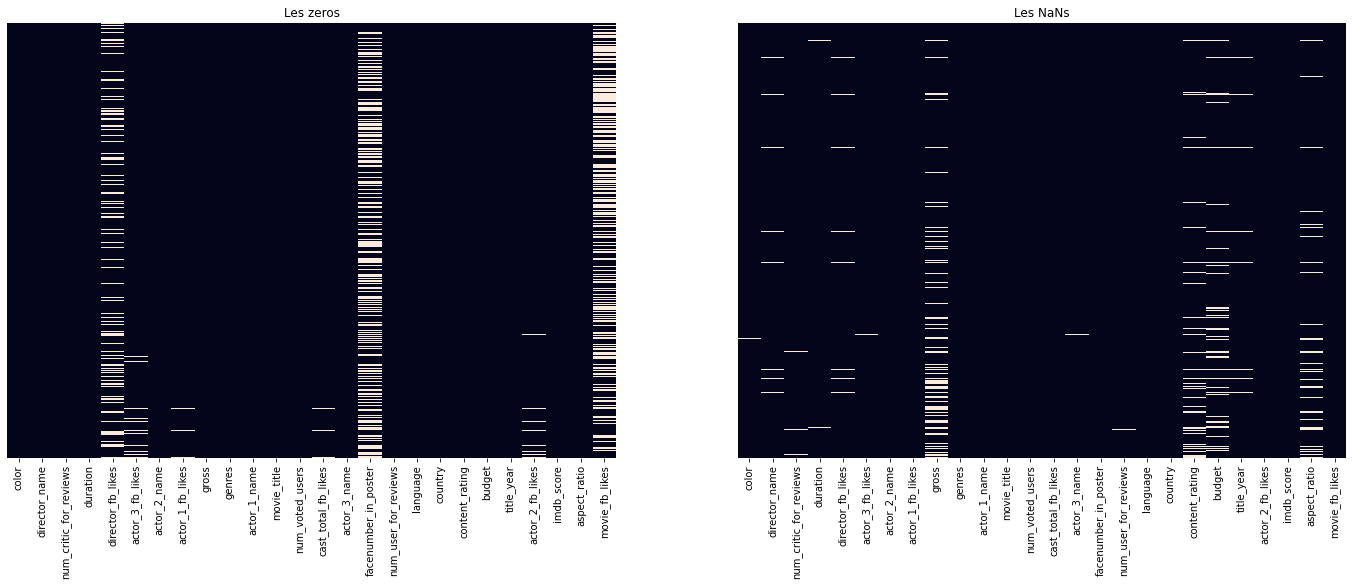

In [11]:
fig, ax = plt.subplots(1,2, figsize=(24,8))
sns.heatmap(df == 0, yticklabels=False,  ax = ax[0], cbar=False)
ax[0].set_title('Les zeros')
sns.heatmap(df.isnull(), yticklabels=False, ax=ax[1], cbar = False)
ax[1].set_title('Les NaNs');


<a id='import_data'></a>

# Gestion des zeros

Pour les valeurs 0, on observe une forte fréquence pour les variables 'director_fb_likes', 'facenumber_in_poster' et 'movie_fb_likes'. Mais la particularité de 'facenumber_in_poster' paraisse incohérente vis-à-vis des deux autres qui semblent être plus ou moins correctes. Le mieux serait de les remplacer par des NaNs

**Visualisons à nouveau les Zéros avec les valeurs nouvelles des varaibles "NaNs" avec celles de 'face_number_in_poster' qui restent inchangées**

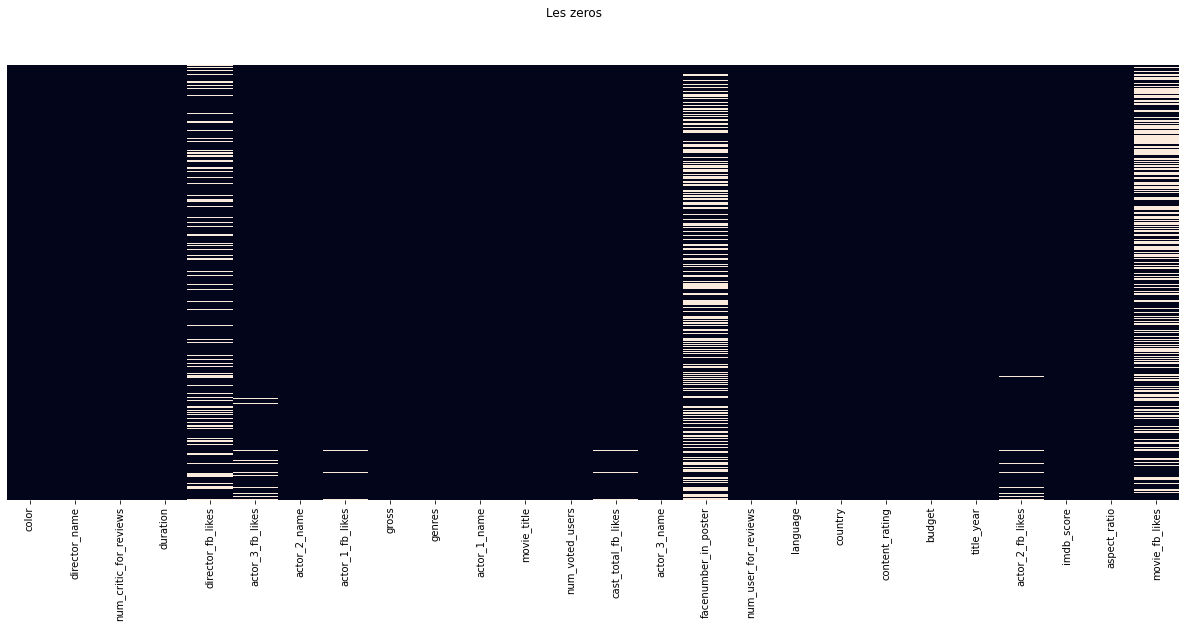

In [12]:
fig = plt.figure(figsize=(21,8))
sns.heatmap(df == 0, yticklabels=False, cbar=False)
plt.suptitle('Les zeros');


In [13]:
#cols = df.columns[(df==0).any()].drop('facenumber_in_poster')
#df[cols]= df[cols].replace(0, np.nan)

**Gestion des NaNs**


On constate que les la proportion des variables 'movie_fb_likes' et 'director_fb_likes' font elles seules environ 2/3 des données de la dataframe ce qui peut l'impacter fortement dans les predictions. Donc je décide de ne pas les garder

In [14]:
#Proportion des NaNs sur l'ensemble des observations de la dataframe
df.isnull().sum().sort_values(ascending = False)/len(df)

gross                     0.134254
budget                    0.080232
aspect_ratio              0.065426
content_rating            0.060224
title_year                0.021409
director_name             0.020608
director_fb_likes         0.020608
num_critic_for_reviews    0.009804
actor_3_fb_likes          0.004602
actor_3_name              0.004602
num_user_for_reviews      0.004202
color                     0.003802
duration                  0.003001
actor_2_fb_likes          0.002601
facenumber_in_poster      0.002601
actor_2_name              0.002601
language                  0.002401
actor_1_fb_likes          0.001401
actor_1_name              0.001401
country                   0.001000
imdb_score                0.000000
cast_total_fb_likes       0.000000
num_voted_users           0.000000
movie_title               0.000000
genres                    0.000000
movie_fb_likes            0.000000
dtype: float64

In [15]:
# Suppression des deux colonnes ayant une part importante des NaN
df.drop(['movie_fb_likes','director_fb_likes'], axis=1, inplace=True)
df.shape

(4998, 24)

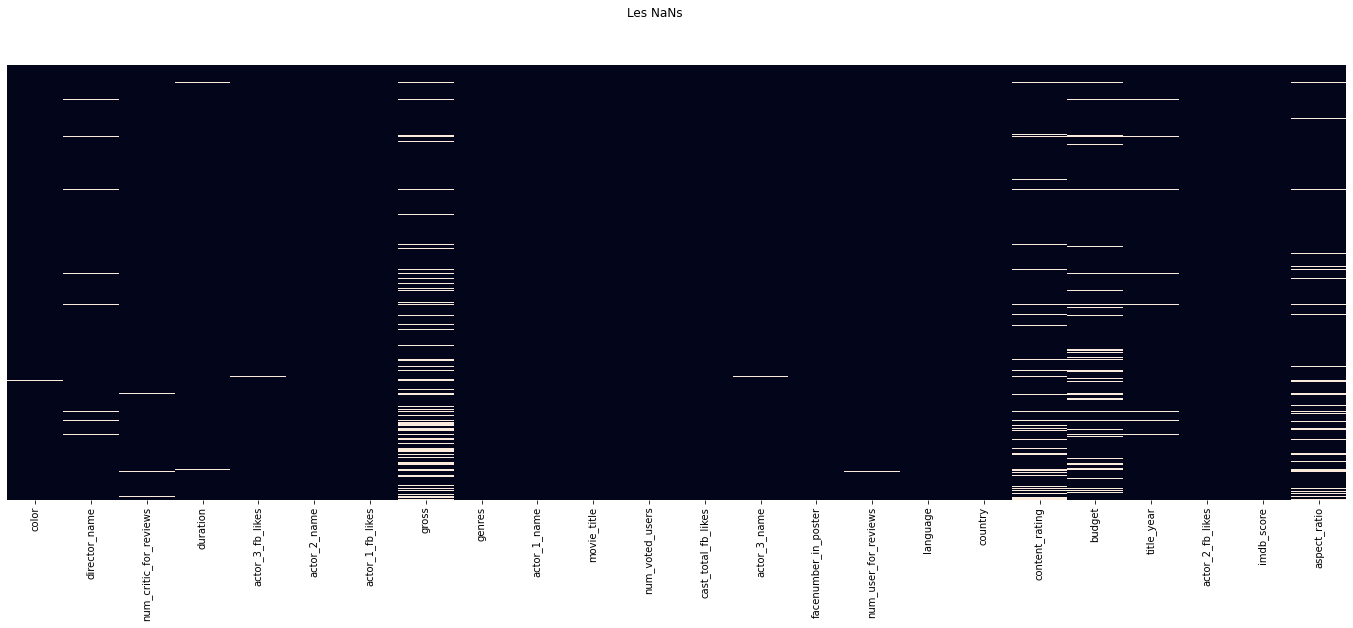

In [16]:
fig = plt.figure(figsize=(24,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.suptitle('Les NaNs');





#### **Modification de variables**

**Verifier l'affichage des informations variables  pour corriger quelques incohérences d'orthographes**

In [17]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'actor_3_fb_likes', 'actor_2_name', 'actor_1_fb_likes', 'gross',
       'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_fb_likes', 'actor_3_name', 'facenumber_in_poster',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_fb_likes', 'imdb_score',
       'aspect_ratio'],
      dtype='object')

In [18]:
df.loc[0].values

array(['Color', 'James Cameron', 723.0, 178.0, 855.0, 'Joel David Moore',
       1000.0, 760505847.0, 'Action|Adventure|Fantasy|Sci-Fi',
       'CCH Pounder', 'Avatar\xa0', 886204, 4834, 'Wes Studi', 0.0,
       3054.0, 'English', 'USA', 'PG-13', 237000000.0, 2009.0, 936.0, 7.9,
       1.78], dtype=object)

**On voit que dans la notation du titre de film présente  \xa0 qu'il faut enlever**

In [19]:
df.movie_title = df.movie_title.apply(lambda x: x.replace('\xa0',''))

**Gerer la variable content_rating en detail puis apporter quelques redéfinitions des valeurs sur les attributs**

In [20]:
df.content_rating.value_counts()

R            2098
PG-13        1444
PG            698
Not Rated     116
G             112
Unrated        60
Approved       55
TV-14          30
TV-MA          19
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

**Une petite recherche et on trouve que historiquement, on a plus ou moins** :

Passed = Approved = M = GP = PG
TV-14 = PG-13
X = NC-17
Not Rated = Unrated = NR
On veut donc remplacer :

Passed, Approved, M et GP par PG
TV-14 par PG-13
X par NC-17
Not Rated et Unrated par UR qui sont les notations utilisées aujourd'hui.

In [21]:
def update_content_rating(row):
    if row['content_rating'] in ['Passed', 'Approved','M','GP']:
        return 'PG'   
    elif row['content_rating'] in ['Not Rated', 'Unrated']:
        return 'UR' 
    elif row['content_rating'] == 'X':
        return 'NC-17'
    elif row['content_rating'] == 'TV-14':
        return 'PG-13'
    else:
        return row['content_rating']
    
df['content_rating'] = df.apply(update_content_rating, axis=1)
df.content_rating.value_counts()

R        2098
PG-13    1474
PG        773
UR        176
G         112
NC-17      20
TV-MA      19
TV-PG      13
TV-G       10
TV-Y        1
TV-Y7       1
Name: content_rating, dtype: int64

**Spliter + Dichotomiser la variable genres**

In [22]:
genre_dummies = df.genres.str.get_dummies('|')
df = pd.concat([df, genre_dummies], axis =1)
df.drop(['genres'], axis=1, inplace=True)

In [23]:
df.language.value_counts()

English       4662
French          73
Spanish         40
Hindi           28
Mandarin        24
German          19
Japanese        17
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Arabic           5
Danish           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Thai             3
Chinese          3
Icelandic        2
None             2
Indonesian       2
Aboriginal       2
Romanian         2
Dari             2
Zulu             2
Panjabi          1
Urdu             1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: language, dtype: int64

**Regrouper les films par categorie de langues en ayant European, English et les autres**

In [24]:
def replace_language(row):
    if row['language'] in ['French', 'Spanish', 'German', 'Italian', 'Portuguese', 'Norwegian', 'Dutch',
    'Danish', 'Romanian', 'Bosnian', 'Czech', 'Hungarian', 'Swedish']:
        return 'European'
    elif row['language'] == 'English':
        return 'English'
    else:
        return 'Other languages'
df['language'] = df.apply(replace_language, axis=1)
df.language.value_counts()                       

English            4662
European            174
Other languages     162
Name: language, dtype: int64

**Regrouper les pays des films par zones géographiques notamment Europe, North America, Other Countries**

In [25]:
df.country.value_counts()

USA              3773
UK                443
France            154
Canada            124
Germany            96
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: country, Length: 65, dtype: int64

In [26]:
def replace_country(row):
    if row['country'] in ['UK', 'France', 'Spain', 'Germany', 'West Germany', 'Italy', 'Portugal', 'Norway', 'Netherlands',
        'Denmark', 'Ireland', 'Romania', 'Iceland', 'Czech', 'Hungary', 'Sweden', 'Belgium', 'Greece',
        'Bulgaria', 'Switzerland', 'Poland', 'Finland']:
        return 'Europe'
    elif row['country'] in ['USA', 'Canada']:
        return 'North America'
    else:
        return 'Other countries'
    
df['country'] = df.apply(replace_country, axis=1)
df.country.value_counts()

North America      3897
Europe              819
Other countries     282
Name: country, dtype: int64

## **4. Analyse exploratoire**

<a id='exploration'></a>

Dans cette partie, vous devez "explorer" vos données. Cette tâche, qui peut s'avérer très vaste, consiste à s'intéresser à l'information contenue dans nos données "au premier abord".

Sont donc attendus dans cette partie :
>- quelques statistiques descriptives
>- entre 6 et 10 visualisations (vous pouvez bien sûr en regrouper plusieurs sur une même figure)
>- et pour chaque résultat/graphique présenté, une explication succinte

**Une analyse descriptive qui nous donne des statistiques descriptives sur les différentes variables de la Dataframe notamment le min, max, moyenne, etc.**

In [27]:
df.describe()

,num_critic_for_reviews,duration,actor_3_fb_likes,actor_1_fb_likes,gross,num_voted_users,cast_total_fb_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,Action,...,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,4949.000000,4983.000000,4975.000000,4991.000000,4.327000e+03,4.998000e+03,4998.000000,4985.000000,4977.000000,4.597000e+03,4891.000000,4985.000000,4998.000000,4671.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,139.890079,107.213325,639.900905,6556.939892,4.659299e+07,8.347020e+04,9676.941176,1.368907,272.014667,3.938145e+07,2002.468820,1642.998796,6.441056,2.221417,0.228691,...,0.000200,0.041016,0.111244,0.042417,0.026411,0.098639,0.000600,0.000400,0.219688,0.122249,0.001000,0.036214,0.279312,0.042217,0.018808
std,121.477586,25.248775,1643.298282,15061.586700,6.690463e+07,1.380866e+05,18165.404578,2.014623,377.776210,2.050767e+08,12.475235,4030.925303,1.124107,1.391185,0.420032,...,0.014145,0.198348,0.314466,0.201559,0.160369,0.298207,0.024495,0.020002,0.414077,0.327606,0.031616,0.186842,0.448706,0.201104,0.135858
min,1.000000,7.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,93.000000,133.000000,611.500000,4.548672e+06,8.560000e+03,1405.500000,0.000000,64.000000,6.000000e+06,1999.000000,280.000000,5.800000,1.850000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110.000000,103.000000,369.000000,984.000000,2.368988e+07,3.426050e+04,3085.500000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,195.000000,118.000000,635.000000,11000.000000,5.960257e+07,9.612075e+04,13740.500000,2.000000,324.000000,4.400000e+07,2011.000000,917.000000,7.200000,2.350000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,813.000000,511.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Une visualtion de l'année et du score des films.=>> montre une forte fréquence des films récents et des scores autour de 7**

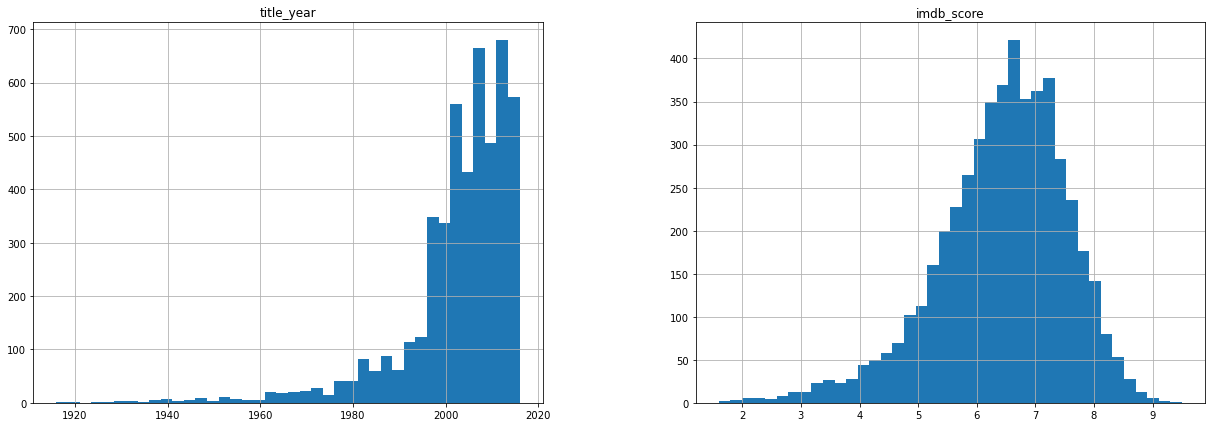

In [28]:
# Films par année de sortie
fig,ax = plt.subplots(1,2, figsize=(21,7))
df.hist('title_year', bins=40, ax= ax[0])
df.hist('imdb_score', bins=40, ax= ax[1])
plt.show()



**Moyenne des score de films selon le genre**

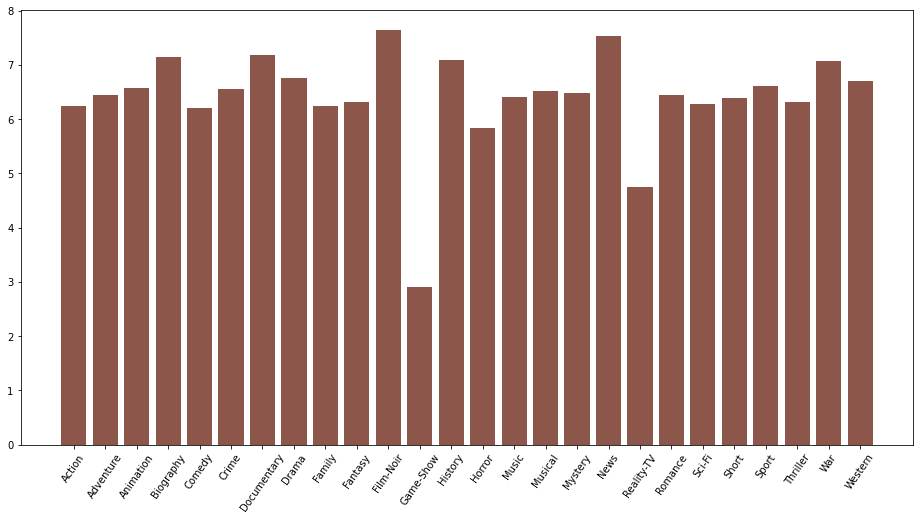

In [29]:
mean_genre = {}
plt.figure(figsize=(16,8))
for gen in df.columns[-26:]:
    mean_genre[gen] = df.loc[df[gen]==1,'imdb_score'].mean()
    plt.bar(mean_genre.keys(), mean_genre.values())
    plt.xticks(rotation=55);


**Marge bénéficiaire sur les films avec les top 25 films les plus rentables**

In [34]:
df['marge'] = df.gross - df.budget
marge_beneficiaire = df[['movie_title', 'title_year','gross', 'budget','marge']].sort_values('marge',ascending=False).iloc[:25].reset_index(drop=True)
marge_beneficiaire

,movie_title,title_year,gross,budget,marge
0,Avatar,2009.0,760505847.0,237000000.0,523505847.0
1,Jurassic World,2015.0,652177271.0,150000000.0,502177271.0
2,Titanic,1997.0,658672302.0,200000000.0,458672302.0
3,Star Wars: Episode IV - A New Hope,1977.0,460935665.0,11000000.0,449935665.0
4,E.T. the Extra-Terrestrial,1982.0,434949459.0,10500000.0,424449459.0
5,The Avengers,2012.0,623279547.0,220000000.0,403279547.0
6,The Lion King,1994.0,422783777.0,45000000.0,377783777.0
7,Star Wars: Episode I - The Phantom Menace,1999.0,474544677.0,115000000.0,359544677.0
8,The Dark Knight,2008.0,533316061.0,185000000.0,348316061.0
9,The Hunger Games,2012.0,407999255.0,78000000.0,329999255.0


## **5. Pré-traitement**

**À FAIRE**

>Maintenant que vous commencez à bien connaître votre base de données, on va la préparer pour la partie modélisation.
>
>Sont donc attendus dans cette partie :
>- restriction aux données utiles à la prédiction : potentiellement certaines variables conservées pour la visualisation sont à supprimer pour la modélisation
>- création des échantillons d'entraînement et de test
>- gestion des variables catégoriques d'un côté et numériques de l'autre
>
>La standardisation n'étant pas toujours nécessaire puisque ça dépend des modèles, vous pouvez choisir de la faire dès maintenant ou bien d'attendre de voir si vous en avez besoin...

In [35]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'actor_3_fb_likes', 'actor_2_name', 'actor_1_fb_likes', 'gross',
       'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_fb_likes',
       'actor_3_name', 'facenumber_in_poster', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_fb_likes', 'imdb_score', 'aspect_ratio', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western', 'marge'],
      dtype='object')

**Interet  de supprimer certaines variables trop disparatres ainsi que celkle du profit créee**

In [36]:
df.drop(['director_name','actor_1_name','actor_2_name', 'actor_3_name', 'marge', 'movie_title'], axis=1, inplace=True)
df.shape

(4998, 44)

**Gestion des variables categorielles avec get_dummies afin de les rendre numeriques**


In [37]:
df.select_dtypes(include="object")

,color,language,country,content_rating
0,Color,English,North America,PG-13
1,Color,English,North America,PG-13
2,Color,English,Europe,PG-13
3,Color,English,North America,PG-13
4,NaN,Other languages,Other countries,NaN
...,...,...,...,...
5038,Color,English,North America,NaN
5039,Color,English,North America,PG-13
5040,Color,English,North America,NaN
5041,Color,English,North America,PG-13


In [38]:
for varcat in df.select_dtypes(include="object").columns:
    dump = pd.get_dummies(df[varcat], drop_first=True)
    df = pd.concat([df, dump], axis=1)
    df.drop([varcat], axis=1, inplace=True)
df

,num_critic_for_reviews,duration,actor_3_fb_likes,actor_1_fb_likes,gross,num_voted_users,cast_total_fb_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,Action,...,Color,European,Other languages,North America,Other countries,NC-17,PG,PG-13,R,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,UR
0,723.0,178.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,1,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,302.0,169.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,1,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,602.0,148.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,1,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,813.0,164.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,1,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,NaN,NaN,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,318.0,637.0,NaN,629,2283,2.0,6.0,NaN,2013.0,470.0,7.7,NaN,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5039,43.0,43.0,319.0,841.0,NaN,73839,1753,1.0,359.0,NaN,NaN,593.0,7.5,16.00,0,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
5040,13.0,76.0,0.0,0.0,NaN,38,0,0.0,3.0,1400.0,2013.0,0.0,6.3,NaN,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5041,14.0,100.0,489.0,946.0,10443.0,1255,2386,5.0,9.0,NaN,2012.0,719.0,6.3,2.35,0,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0


**Ici, l'hypothèse est de tester différentes variables et garder que celles dont les coefficients sont significatifs c'est àd ire impactent le modele**.

In [39]:
df.describe()

,num_critic_for_reviews,duration,actor_3_fb_likes,actor_1_fb_likes,gross,num_voted_users,cast_total_fb_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,Action,...,Color,European,Other languages,North America,Other countries,NC-17,PG,PG-13,R,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,UR
count,4949.000000,4983.000000,4975.000000,4991.000000,4.327000e+03,4.998000e+03,4998.000000,4985.000000,4977.000000,4.597000e+03,4891.000000,4985.000000,4998.000000,4671.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,139.890079,107.213325,639.900905,6556.939892,4.659299e+07,8.347020e+04,9676.941176,1.368907,272.014667,3.938145e+07,2002.468820,1642.998796,6.441056,2.221417,0.228691,...,0.954782,0.034814,0.032413,0.779712,0.056423,0.004002,0.154662,0.294918,0.419768,0.002001,0.003802,0.002601,0.000200,0.000200,0.035214
std,121.477586,25.248775,1643.298282,15061.586700,6.690463e+07,1.380866e+05,18165.404578,2.014623,377.776210,2.050767e+08,12.475235,4030.925303,1.124107,1.391185,0.420032,...,0.207803,0.183327,0.177112,0.414482,0.230759,0.063138,0.361618,0.456052,0.493570,0.044690,0.061545,0.050939,0.014145,0.014145,0.184339
min,1.000000,7.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,93.000000,133.000000,611.500000,4.548672e+06,8.560000e+03,1405.500000,0.000000,64.000000,6.000000e+06,1999.000000,280.000000,5.800000,1.850000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110.000000,103.000000,369.000000,984.000000,2.368988e+07,3.426050e+04,3085.500000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,195.000000,118.000000,635.000000,11000.000000,5.960257e+07,9.612075e+04,13740.500000,2.000000,324.000000,4.400000e+07,2011.000000,917.000000,7.200000,2.350000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,813.000000,511.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df = df.dropna(axis =1)
X = df.drop('imdb_score', axis=1)
y = df['imdb_score']
X.shape, y.shape

((4998, 43), (4998,))

**Définition du model d'entrainement et du model test pour la modelisation**

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3998, 43), (1000, 43), (3998,), (1000,))

**Standardisation des variables**

In [42]:
#standardisation des variables du modele
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns, index = X_test.index)

## **6. Une régression linéaire**

**À FAIRE**

>Tout est dans le titre. Vous devez ici entraîner et tester une régression linéaire pour la prédiction de la note IMDB.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des coefficients et de leur significativité
>- le choix d'une mesure d'évaluation du modèle et son interprétation
>- une validation croisée pour l'estimation de la qualité du modèle
>- *facultatif : l'ajout d'une régularisation Ridge ou Lasso pour déterminer si les résultats sont meilleurs*

In [43]:
# Les coefficients du modele et leurs significations
from statsmodels.api import OLS, add_constant

model = OLS(y_train, add_constant(X_train))
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     62.71
Date:                Tue, 11 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:12:06   Log-Likelihood:                -5125.8
No. Observations:                3998   AIC:                         1.034e+04
Df Residuals:                    3955   BIC:                         1.061e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.5465    

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Validation croisé pour une meilleure estimation du modele**

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

cross_val_score(LinearRegression(), X_train, y_train, cv=None)

array([0.38147828, 0.40063064, 0.40122571, 0.40851677, 0.33046261])

**Calcul des erreurs standard servant d'indicateur d'amélioration du modele - MSE**

In [50]:
from sklearn.metrics import mean_squared_error
X_test_const = add_constant(X_test)
error0 = mean_squared_error(OLS(y_train,add_constant(X_train)).fit().predict(add_constant(X_test)),y_test)
error0

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.7854509967199453

**Le MSE est l'indicateur à minimiser dans une regression lineaire alors qu'elle est très élévée ce qui remet en question la qualité du modèle**

*facultatif : l'ajout d'une régularisation Ridge ou Lasso pour déterminer si les résultats sont meilleurs*

 **Modele de Regression Ridge avec les parametres de penalisation**

In [51]:
# Définition des coefficients de regularisation à tester 
alphas = np.logspace(-5, 5, 200)

In [52]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# on va entrainer le modèle

coefs = []
errors_ridge = []
for a in alphas:
  ridge.set_params(alpha = a)
  ridge.fit(X_train, y_train)
  coefs.append(ridge.coef_)
  errors_ridge.append(mean_squared_error(ridge.predict(X_test), y_test))


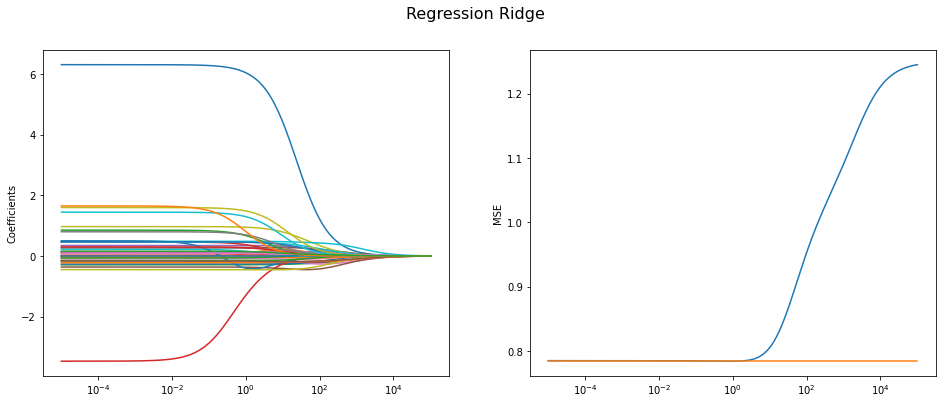

In [53]:
# Mettons en exergue l'affichage des courbes d'évolution des coef et des erreurs en foncion des valeurs de alphas
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))


ax1.plot(alphas, coefs)
ax1.set_xscale('log')
ax1.set_label('Paramètres de régularisation')
ax1.set_ylabel('Coefficients')

ax2.plot(alphas, errors_ridge,[10**-5, 10**5],[error0, error0])
ax2.set_xscale('log')
ax2.set_label('Paramètres de régularisation')
ax2.set_ylabel('MSE')

plt.suptitle('Regression Ridge', fontsize=16)

plt.show()

In [54]:
#Erreur minimum de la regression Ridge et la valeur de alpha qui minimise le modele

print(round(min(errors_ridge), 4), '\n', alphas[np.argmin(errors_ridge)])

0.7847 
 0.9437878277775391


 **Modele de Regression Lasso avec les parametres de penalisation**

In [55]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# Entrainer le modele

coefs = []
errors_lasso = []
for a in alphas:
  lasso.set_params(alpha = a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_ )
  errors_lasso.append(mean_squared_error(lasso.predict(X_test), y_test))

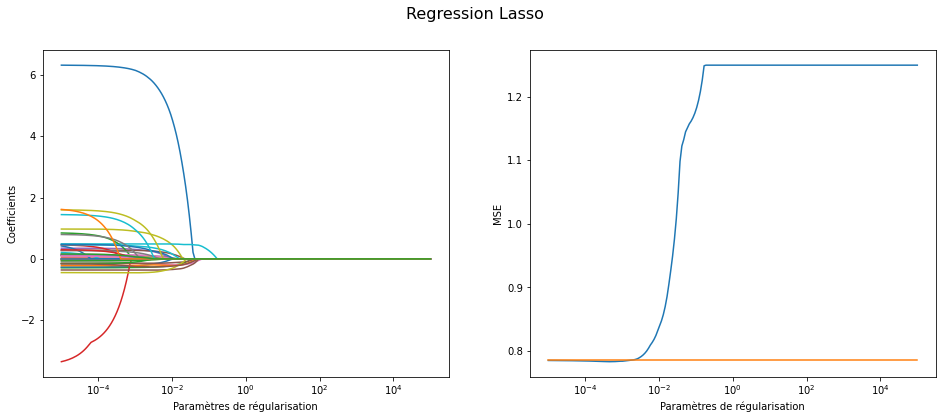

In [56]:
# Mettons en exergue l'affichage des courbes d'évolution des coef et des erreurs en foncion des valeurs de alphas

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.plot(alphas, coefs)
ax1.set_xscale('log')
ax1.set_xlabel('Paramètres de régularisation')
ax1.set_ylabel('Coefficients')


ax2.plot(alphas, errors_lasso, [10**-5, 10**5], [error0, error0])
ax2.set_xscale('log')
ax2.set_xlabel('Paramètres de régularisation')
ax2.set_ylabel('MSE')


plt.suptitle('Regression Lasso', fontsize=16)
plt.show()

In [57]:
#Erreur minimum de la regression Ridge et la valeur de alpha qui minimise le modele
print(round(min( errors_lasso),4), '\n', alphas[np.argmin( errors_lasso)])

0.7834 
 0.00045529350748669476


**Synthèse des différents modèles**

In [58]:
print(f"MSE_regression_lineaire = {error0}")
print(f"MSE_regression_Ridge = {np.min(errors_ridge)}")
print(f"MSE_regression_Lasso = {np.min(errors_lasso)}")


MSE_regression_lineaire = 0.7854509967199453
MSE_regression_Ridge = 0.7846608713632047
MSE_regression_Lasso = 0.7834142343151081


**On peut retenir que la regression Lasso est celle qui minimise l'erreur du modèle qui malgré tout reste très élevée**

## **7. D'autres modèles de régression**

**À FAIRE**

>Tout est encore dans le titre. Mettez en place le modèle **de régression** que vous souhaitez.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle avec `cross_val_score` ou `cross_validate`
>- affinage des éventuels hyperparamètres avec `GridSearchCV`

**Etant donnée que la variable dépendante du modèle est une variable continue, d'autres modèles de régression existent pour prédire ce modèle comme svm, random forest, etc...**

**1er Cas - Forêts aleatoires**

In [59]:
from sklearn.ensemble import RandomForestRegressor
rfa = RandomForestRegressor(n_estimators=500)
rfa.fit(X_train, y_train)
y_pred_rfa = rfa.predict(X_test)

**MSE avec le randomForest**

In [60]:
mean_squared_error(y_pred_rfa, y_test)

0.6392438253200011

**Voyons ce que cela donne avec la validation croisée en utilisant différents paramètres**

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 500,1000]
}

grid_cv_rfa = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=3, n_jobs=1)
grid_cv_rfa.fit(X_train, y_train)
grid_cv_rfa.best_params_

{'max_depth': 15, 'n_estimators': 1000}

**MSE**

In [63]:
y_pred_rfa_grid_cv = grid_cv_rfa.predict(X_test)
mean_squared_error(y_pred_rfa_grid_cv, y_test)

0.6403918395978121

**2e Cas - SVM**

In [64]:
from sklearn.svm import SVR

**pour le kernel linear**

In [65]:
svr_lin = SVR(kernel='linear', gamma='auto')
svr_lin.fit(X_train, y_train)
y_pred_svr_l = svr_lin.predict(X_test)

mean_squared_error(y_pred_svr_l, y_test)

0.796092341326871

**pour le rbf**

In [66]:
svr_rbf =  SVR(kernel='rbf', gamma='auto')
svr_rbf.fit(X_train, y_train)
y_pred_svr_rbf = svr_rbf.predict(X_test)

mean_squared_error(y_pred_svr_rbf, y_test)

0.8395086010221587

In [67]:
svr_poly =  SVR(kernel='poly', gamma=0.1,degree=2)

svr_poly.fit(X_train, y_train)
y_pred_svr_poly = svr_poly.predict(X_test)

mean_squared_error(y_pred_svr_poly, y_test)

0.8222265014821057

**Voyons ce que cela donne avec la validation croisée en utilisant différents paramètres**

In [ ]:
from sklearn.model_selection import GridSearchCV
model = SVR()

param_grid = {
    'C': [10**k for k in range(-2,2)],
    'kernel' : ['linear', 'poly', 'rbf'],
    'degree' : [3,4],
    'coef0' : [-1,-0.5,0,0.5],
    'gamma' : ['auto', 'scale', 0.1, 0.001, 0.0001]
}
grid_cv_svm = GridSearchCV(model, param_grid, n_jobs=-1)

grid.fit(X_train, y_train)
#print(grid.best_params_)

**Visualisation du modele qui affine un peu nos predictions en ùminimisant l'erreur**

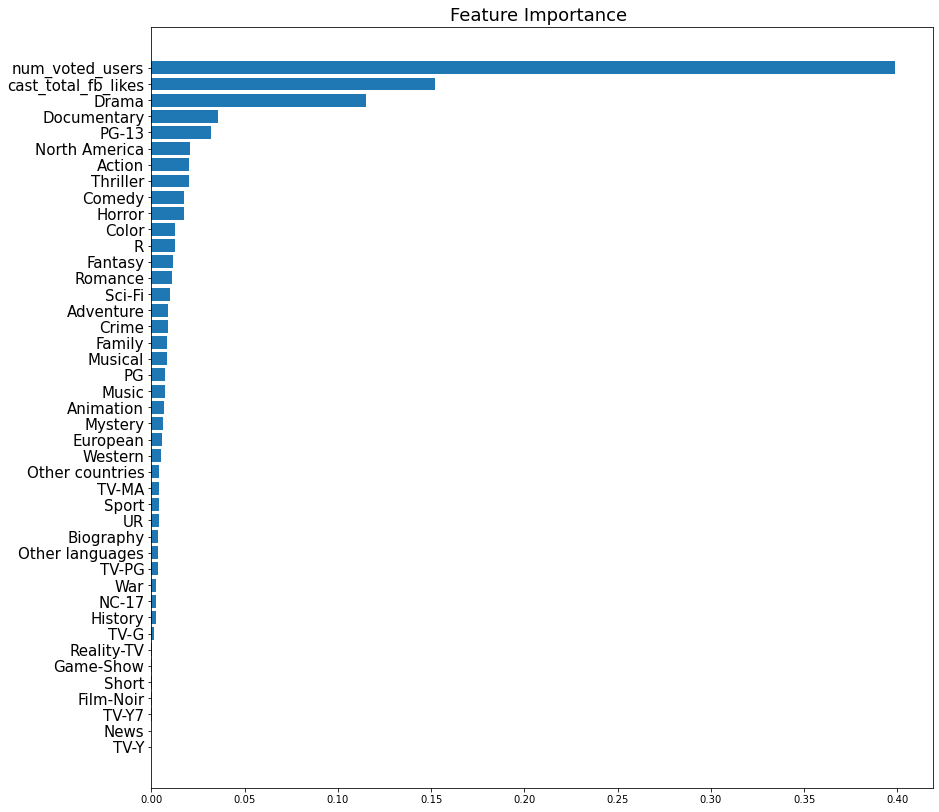

In [71]:
feature_importance = grid_cv_rfa.best_estimator_.feature_importances_
sorted_importance = np.argsort(feature_importance)
pos = np.arange(len(sorted_importance))
plt.figure(figsize=(14,14))
plt.barh(pos, feature_importance[sorted_importance],align='center')
plt.yticks(pos, X_train.columns[sorted_importance],fontsize=15)
plt.title('Feature Importance ',fontsize=18)
plt.show()

## **8. De la régression à la classification**

**À FAIRE**

>Transformez le problème de régression en un problème de classification par une discrétisation du score IMDB en 5 classes : nul, bof, sympa, bon, super.  
>Justifiez votre découpage en indiquant quels seuils vous avez utilisé et pourquoi.

**Transformons la variable dépendante numérique continue en variable catégorielle ordinale**

In [72]:
y_ord = pd.cut(df['imdb_score'], bins=[0,4,6,7,8,10], right=True, labels= ['nul', 'bof', 'sympa', 'bon','super'])
y_ord.value_counts()

sympa    1851
bof      1398
bon      1327
super     250
nul       172
Name: imdb_score, dtype: int64

**Le choix des bins(seuil): je voulais répartir les scores de manières à avoir des valeurs pas trop faibles dans chacune des classes**

<a id='reglog'></a>

**On va entrainer à nouveau le model avec des la nouvelles variable dépendante y_ord**

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_ord, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3998, 43), (1000, 43), (3998,), (1000,))

## **9. Une régression logistique**

**À FAIRE**

>Vous devez ici entraîner et tester une régression logistique pour la prédiction de la classe du film.  
>Par ailleurs, sont attendus ici :
>- un affichage et une interprétation des *Odds-ratio* et de leur significativité
>- le choix d'une ou plusieurs mesures d'évaluation du modèle et leur interprétation
>- une validation croisée pour l'évaluation modèle
>- l'affinage des hyperparamètres avec l'outil qui va bien
>- peut-on tracer les courbes ROC et calculer l'AUC ? Pourquoi ?

**Affichage des prédictions du modele via matrix de confusion**

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, r2_score as score
reglog = LogisticRegression()
reglog.fit(X_train, y_train)

LogisticRegression()

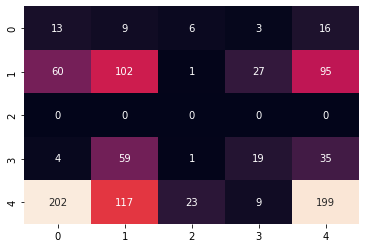

In [77]:
sns.heatmap(confusion_matrix(reglog.predict(X_test),y_test, labels=reglog.classes_), annot=True, fmt='d', cbar=False);

**Evaluation du modele**

In [78]:
print(f"Score_train: {reglog.score(X_train, y_train) }, Score_test: {reglog.score(X_test, y_test)}")

Score_train: 0.35617808904452225, Score_test: 0.333


**Le modele de l'echantillon tesst predit bien le model entrainé mais on reste toujours à des scores relativement faibles**

In [79]:
from sklearn.metrics import classification_report
print(classification_report(reglog.predict(X_test), y_test));

              precision    recall  f1-score   support

         bof       0.05      0.28      0.08        47
         bon       0.36      0.36      0.36       285
         nul       0.00      0.00      0.00         0
       super       0.33      0.16      0.22       118
       sympa       0.58      0.36      0.44       550

    accuracy                           0.33      1000
   macro avg       0.26      0.23      0.22      1000
weighted avg       0.46      0.33      0.38      1000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a id='autre_class'></a>

## **10. Un autre modèle de classification**

**À FAIRE**

>Au choix, une autre méthode de classification. Évidemment, sentez-vous libre d'en essayer plus d'une et de les comparer.  
>Sont donc attendus dans cette partie :
>- une petite phrase pour justifier votre choix
>- les pré-traitements supplémentaires nécessaires s'il y en a
>- évaluation du modèle
>- étude de l'importance des paramètres, si votre modèle le permet
>- affinage des éventuels hyperparamètres

**Justifier le choix des modeles de classification**

**1er choix : SVM
Cette méthode de classification dépend seulement de quelques vecteurs supports, donc très compact en termes d'espaces mémoire et aussi très rapide à entrainer**

In [81]:
from sklearn.svm import SVC

<a id='option'></a>

**pour le kernel == rbf**

In [86]:
svc_rbf = SVC(kernel='rbf', C= 1)
svc_rbf.fit(X_train, y_train)
print(classification_report( y_test, svc_rbf.predict(X_test)));

              precision    recall  f1-score   support

         bof       0.37      0.46      0.41       279
         bon       0.52      0.20      0.29       287
         nul       0.00      0.00      0.00        31
       super       0.80      0.21      0.33        58
       sympa       0.38      0.57      0.46       345

    accuracy                           0.40      1000
   macro avg       0.41      0.29      0.30      1000
weighted avg       0.43      0.40      0.37      1000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**pour le kernel == poly**

In [87]:
svc_poly = SVC(kernel='poly', C= 1, gamma='scale')
svc_poly.fit(X_train, y_train)
print(classification_report( y_test, svc_poly.predict(X_test)))

              precision    recall  f1-score   support

         bof       0.00      0.00      0.00       279
         bon       0.55      0.09      0.16       287
         nul       0.00      0.00      0.00        31
       super       0.80      0.21      0.33        58
       sympa       0.36      0.97      0.52       345

    accuracy                           0.38      1000
   macro avg       0.34      0.25      0.20      1000
weighted avg       0.33      0.38      0.25      1000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**2eme choix : Random forest
Tant bien même que cette technique reste parfois difficilement interprétable,  Cette méthode de classification demeure facile et rapide à mettre en oeuvre avec des classes qui sont tres indépendantes les une des autres**

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
param_grid = {
    'max_depth': [50, 100, 150],
    'n_estimators': [100, 500, 1000, 1500],
    'random_state' :[0]
}

grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search_rfc.fit(X_train, y_train)
print(classification_report(y_test, grid_search_rfc.predict(X_test), zero_division=0))

/opt/homebrew/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


              precision    recall  f1-score   support

         bof       0.56      0.63      0.59       279
         bon       0.61      0.55      0.58       287
         nul       0.20      0.03      0.06        31
       super       0.68      0.26      0.38        58
       sympa       0.51      0.59      0.54       345

    accuracy                           0.55      1000
   macro avg       0.51      0.41      0.43      1000
weighted avg       0.55      0.55      0.54      1000



**Intrpretation des resultats se fera sur le modele des forets aleatoires >> accuracy plus elevé**

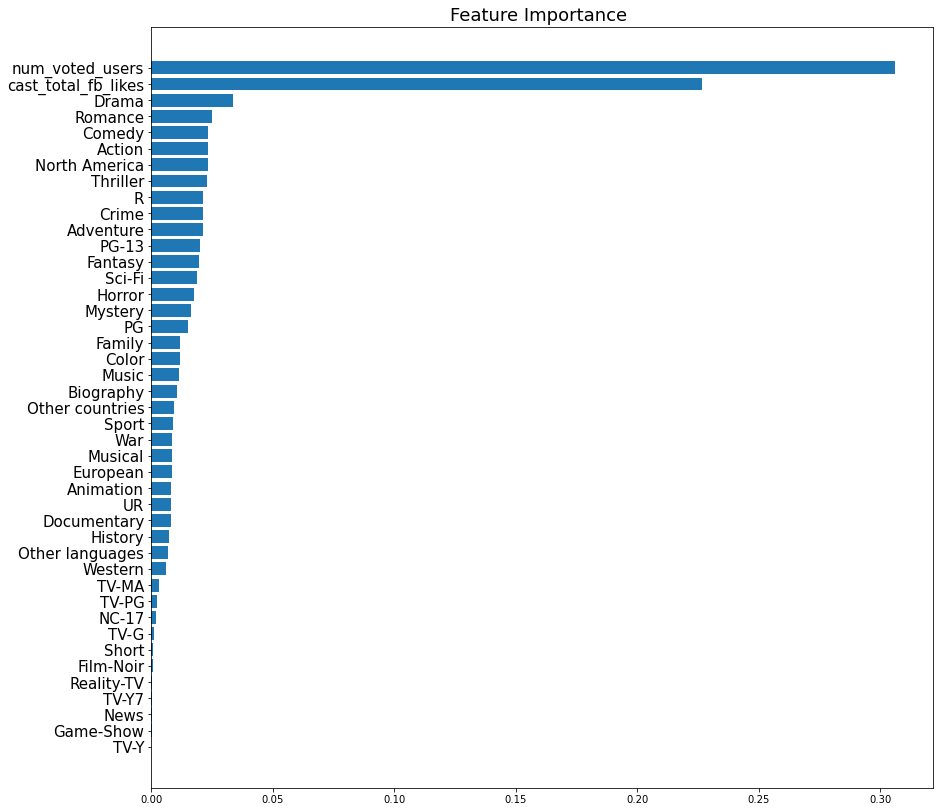

In [90]:
feature_importance = grid_search_rfc.best_estimator_.feature_importances_
sorted_importance = np.argsort(feature_importance)
pos = np.arange(len(sorted_importance))
plt.figure(figsize=(14,14))
plt.barh(pos, feature_importance[sorted_importance],align='center')
plt.yticks(pos, X_train.columns[sorted_importance],fontsize=15)
plt.title('Feature Importance ',fontsize=18)
plt.show()

## **11. En option**

Bravo, si vous êtes arrivés jusqu'ici !!!

Pour les flèches, hésitez pas à continuer si vous en voulez encore et pour les autres, hésitez pas à y revenir à l'occasion.

<a id='reco'></a>

### **11.1. Un outil de recommandation**

**À FAIRE**

>Question un peu plus ouverte pour terminer: en utilisant une méthode de clustering (donc d'apprentissage non-supervisé), construisez un petit outil de recommandation de films.  
>Pour un film donné, votre méthode doit donc retourner les films qui lui ressemblent le plus.  
>Pour rappel, on avait fait un petit exercice comme celui-ci lorsqu'on avait vu les *k-plus proches voisins*, donc vous êtes invités à ne pas utiliser kNN, sinon c'est pas drôle...
>Vous pourrez bientôt aller plus loin en créant une petite application web permettant une interface pour choisir un film.

In [91]:
y_ord = pd.cut(df['imdb_score'], bins=[0,4,6,7,8,10], right=True, labels= [1, 2, 3, 4,5])
y_ord.value_counts()

3    1851
2    1398
4    1327
5     250
1     172
Name: imdb_score, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_ord, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3998, 43), (1000, 43), (3998,), (1000,))

**1er modele de Clustering: KMEANS >> pour rapidement classifier des données volumineuses**

In [103]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
km.fit(X_train)
y_pred_km = km.predict(X_test)

**Evaluation du modele KMeans**

In [ ]:
# matrice de confusion
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.heatmap(confusion_matrix(y_pred_km,y_test, labels=km.labels_), annot=True,  fmt='d', cbar=False);

**Le souci revient à chosir le nombre de cluster ou classes qui definissera bine le modele**

**Calculons la somme des distances de chaque points du modele à son centroïde**

In [ ]:
sommes_distances = [KMeans(n_clusters=k).fit(X_train).inertia_ for k in range(1,20)]

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20), sommes_distances)
plt.xlabel("Valeur de K")
plt.ylabel("Somme des distances de chaque point à leur centroïde")
plt.xticks(range(1,20));

**Visualisation des clusters du modele avec les différentes valeurs de k**

In [ ]:
km2 = KMeans(2).fit(X_train, y_train)
km_2cl = km2.predict(X_test);

In [ ]:

km3 = KMeans(3).fit(X_train, y_train)
km_3cl = km3.predict(X_test);

In [ ]:
km4 = KMeans(4).fit(X_train, y_train)
km_4cl = km4.predict(X_test);

In [ ]:
import matplotlib.pyplot as plt
fig , (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(21,6))

ax1.scatter(X[:,0], X[:,1], c=km2.labels_)

plt.show()

In [ ]:
# on choisit 3, 4 ou 5 classes
df.index = y_ord
df['km_2cl'] = KMeans(2).fit(X).labels_
df['km_3cl'] = KMeans(3).fit(X).labels_
df['km_4cl'] = KMeans(4).fit(X).labels_
df['km_5cl'] = KMeans(5).fit(X).labels_
df[['km_2cl','km_3cl', 'km_4cl', 'km_5cl']].sort_values('km_5cl', axis=0)

**2e modele de Clustering: DBSCAN >> pour rapidement classifier des données volumineuses en laissant le choix au modele de determiner lui même le nombre de clusters adaptés**

In [ ]:
from sklearn.cluster import DBSCAN
pred=df[['km_2cl','km_3cl', 'km_4cl', 'km_5cl']]
for eps in [2, 2.25, 2.5]:
    for min_samples in [2, 3]:
        db = DBSCAN(eps=eps ,min_samples=min_samples).fit(X)
        pred.loc[:, f'db_{eps}_{min_samples}'] = db.labels_
pred.sort_values('km_3cl', axis=0)

### **11.2. Sauvegarder un modèle**

**À FAIRE**

>Utilisez le module `pickle` pour sauvegarder le meilleur de vos modèles et le recharger ensuite.

<a id='acp'></a>

### **11.3. Analyse en Composantes Principales**

**À FAIRE**

>Utilisez une ACP pour visualiser vos données en dimension 2 ou 3 avec des points dont la couleur varie en fonction de la classe.  

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
plt.figure(figsize=(10,8))
scat = plt.scatter(X_pca[:,0], X_pca[:,1],
                   c=y_train,
                   alpha=0.5, s=12)
plt.legend(*scat.legend_elements());